In [26]:
import numpy as np
import pandas as pd
import scipy.optimize as optimization
import matplotlib.pyplot as plt

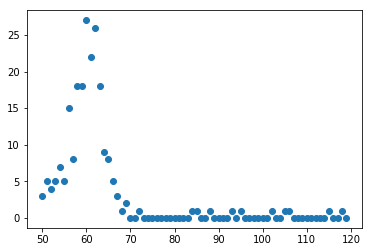

In [102]:
channel = np.linspace(0,255, num=256)
values = np.loadtxt('70_1166.txt')
plt.scatter(channel[50:120], values[50:120])

In [103]:
error = np.sqrt(values)

startVal = 50
endVal = 69

def gauss(x, m, s, A):
    return A/(np.sqrt(2*np.pi)*s)*np.exp(-((x-m)/(2*s))**2)

x0 = np.array([90.,5., 25.])

params, cov = optimization.curve_fit(gauss, channel[startVal:endVal], values[startVal:endVal],
                                     x0, error[startVal:endVal])
perr = np.sqrt(np.diag(cov))

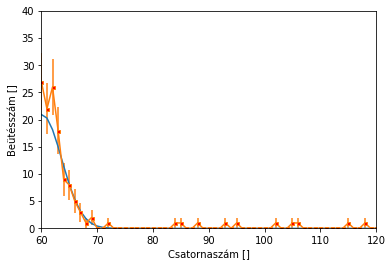

In [104]:
plt.plot(channel, gauss(channel, *params))
plt.errorbar(channel, values, error, marker='s', mfc='red', ms=3)
plt.xlim(60,120)
plt.ylim(0,40)
plt.xlabel('Csatornaszám []')
plt.ylabel('Beütésszám []')
plt.savefig('70_1166.png')

In [105]:
np.savetxt('70_1166gaussfit.dat', (params, perr))